# Laboratory practice № 2 (dynamic processes, free movement & stability)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np

In [2]:
dt = 0.001

## Task 1 (free movement)

Mode pairs: 

3. neutral & stable aperiodic
4. neutral & unstable aperiodic
8. pair of unstable oscillating modes


In [3]:
a_1 = sympy.Symbol("a_1")
a_2 = sympy.Symbol("a_2")
lambdas = [
    [0, -1],
    [0, 0.3],
    [0.4 + 2*sympy.I, 0.4 - 2*sympy.I]
]

In [4]:
sols = []
for l in lambdas:
    sol = sympy.solve([l[0] + l[1] + a_1,l[0]*l[1] -a_2],a_1,a_2)
    sols.append([float(sol[a_1]), float(sol[a_2])])
    print("Solutions:",*sols[-1])

Solutions: 2.0 0.0
Solutions: -0.3 0.0
Solutions: -0.8 4.16


Lets solve these ODEs analytically

In [5]:
y = sympy.Function("y")
t = sympy.Symbol("t")

In [6]:
sympy.dsolve(y(t).diff(t,2)+sols[0][0]*y(t).diff(t) + sols[0][1]*y(t), 0)

Eq(y(t), C1 + C2*exp(-2.0*t))

In [7]:
sympy.dsolve(y(t).diff(t,2)+sols[1][0]*y(t).diff(t) + sols[1][1]*y(t), 0)

Eq(y(t), C1 + C2*exp(0.3*t))

In [8]:
sympy.dsolve(y(t).diff(t,2)+sols[2][0]*y(t).diff(t) + sols[2][1]*y(t), 0)

Eq(y(t), (C1*sin(2.0*t) + C2*cos(2.0*t))*exp(0.4*t))

Simulate

In [9]:
transferFunction_1_1 = ctrl.tf([1.], [1., *sols[0]])
transferFunction_1_2 = ctrl.tf([1.], [1., *sols[1]])
transferFunction_1_3 = ctrl.tf([1.], [1., *sols[2]])

Convert all the tfs to state space (to manage state initial conditions)

In [10]:
state_space_1_1, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_1), form="reachable")
state_space_1_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_2), form="reachable")
state_space_1_3, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1_3), form="reachable")

In [11]:
modeling_time_1 = 10 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1 = np.ones_like(time_1)*0 # free movement

In [12]:
color = ["b", "g", "r"]

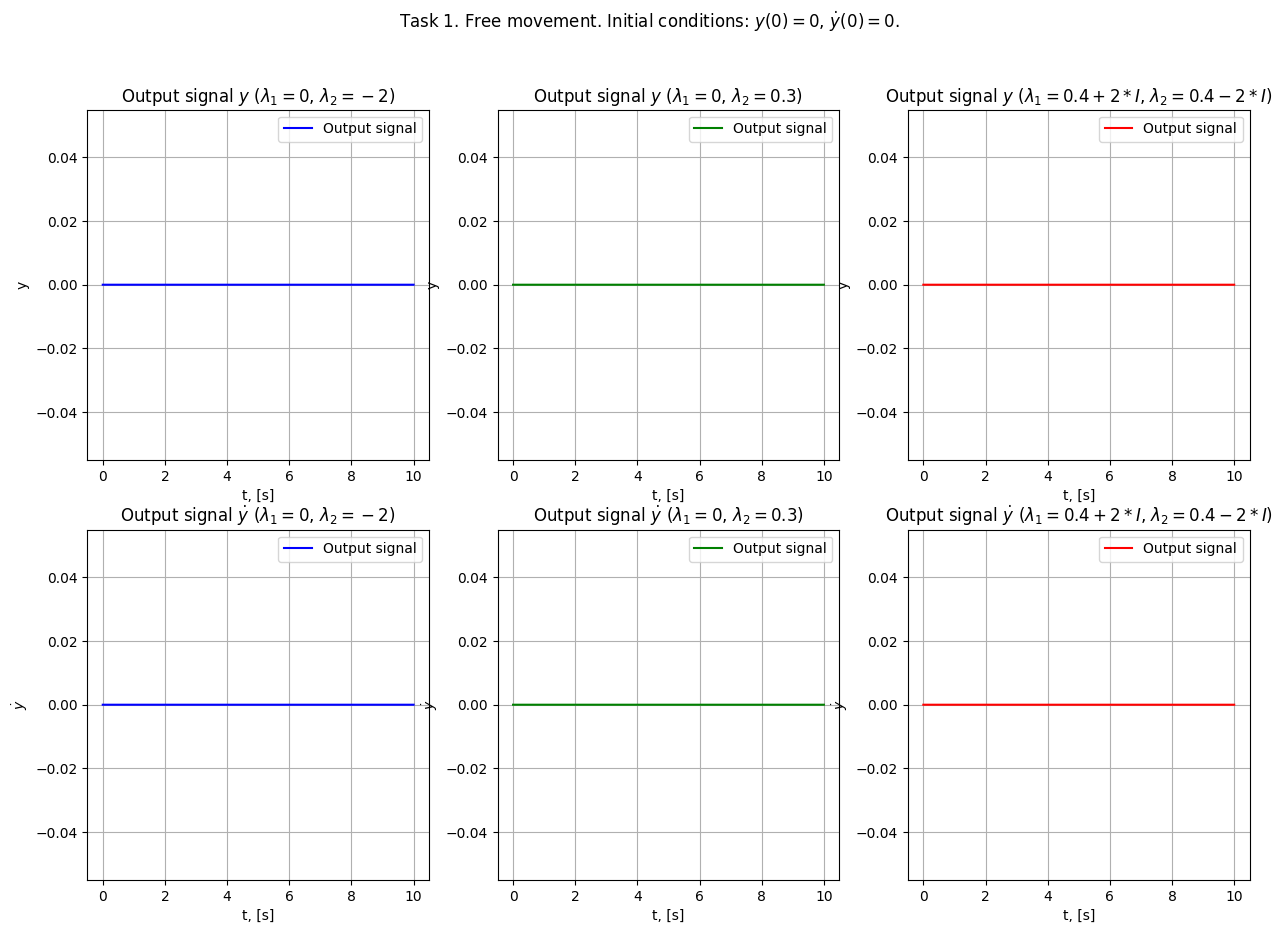

In [13]:
init_state_1 = [0,0]
y_1_1 = []
y_1_1.append(ctrl.forced_response(state_space_1_1, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_2, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_3, U=u_1, X0=init_state_1, T=time_1))


# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 1. Free movement. Initial conditions: $y(0)={init_state_1[0]}$, $\dot y (0)={init_state_1[1]}.$")
for i in range(len(y_1_1)):
    ax[0,i].plot(time_1, y_1_1[i].states[0,:], color[i],label=f"Output signal")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[0,i].legend()

    ax[1,i].plot(time_1, y_1_1[i].states[1,:], color[i],label=f"Output signal")
    ax[1,i].set_ylabel("$\dot y$")
    ax[1,i].set_xlabel("t, [s]")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"Output signal $\dot y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[1,i].legend()

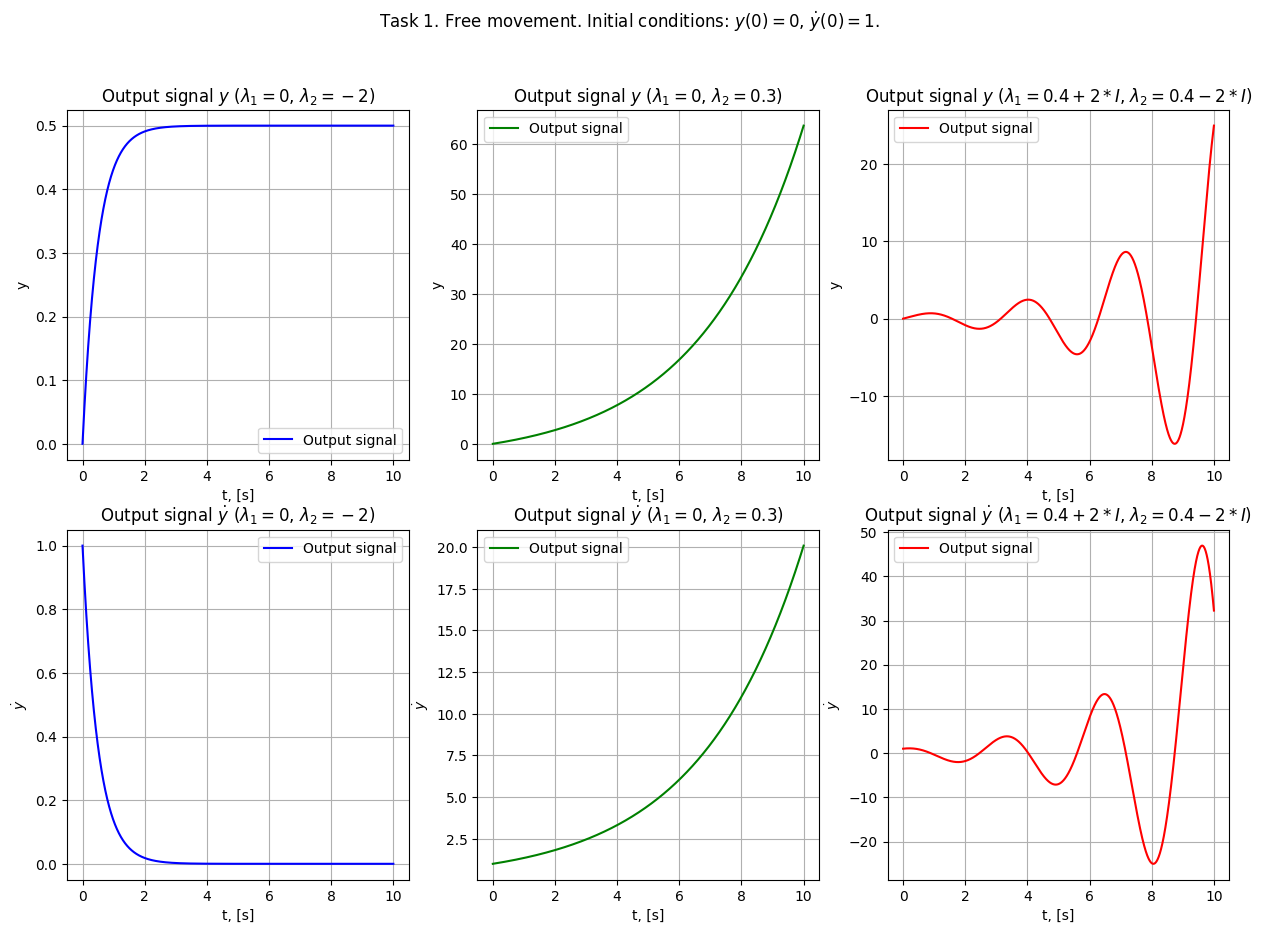

In [14]:
init_state_1 = [1,0]
y_1_1 = []
y_1_1.append(ctrl.forced_response(state_space_1_1, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_2, U=u_1, X0=init_state_1, T=time_1))
y_1_1.append(ctrl.forced_response(state_space_1_3, U=u_1, X0=init_state_1, T=time_1))


# Plotting
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f"Task 1. Free movement. Initial conditions: $y(0)={init_state_1[1]}$, $\dot y (0)={init_state_1[0]}.$")
for i in range(len(y_1_1)):
    ax[0,i].plot(time_1, y_1_1[i].outputs, color[i],label=f"Output signal")
    ax[0,i].set_ylabel("y")
    ax[0,i].set_xlabel("t, [s]")
    ax[0,i].grid(True)
    ax[0,i].set_title(f"Output signal $y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[0,i].legend()

    ax[1,i].plot(time_1, y_1_1[i].states[0,:], color[i],label=f"Output signal")
    ax[1,i].set_ylabel("$\dot y$")
    ax[1,i].set_xlabel("t, [s]")
    ax[1,i].grid(True)
    ax[1,i].set_title(f"Output signal $\dot y$ ($\lambda_1={lambdas[i][0]}$, $\lambda_2={lambdas[i][1]}$)")
    ax[1,i].legend()

## Task 2 (stability area)

In [ ]:
T_1_s = -1